<a href="https://colab.research.google.com/github/Helios109/Verylimitedtoystore/blob/main/COMPLETE_Environmental_Impact_of_Food_Production_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 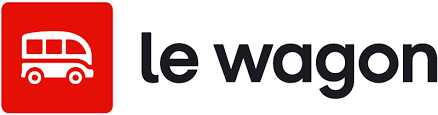

In [1]:
#To connect the notebook to our folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import datetime

import plotly.express as px

### Importing dataset

## Context
In this exercise, you will be working with a dataset that contains information about the ecological impact of a food product. The objective is to gain a deeper understanding of how our food consumption can affect nature.

---
## Importing data

1- Import the data with pandas

2- Download and import Food_Production.csv to colab

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Food_Production.csv')

# Display the first few rows of the dataframe
print(df.head())


          Food product  Land use change  Animal Feed  Farm  Processing  \
0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1         Maize (Meal)              0.3          0.0   0.5         0.1   
2        Barley (Beer)              0.0          0.0   0.2         0.1   
3              Oatmeal              0.0          0.0   1.4         0.0   
4                 Rice              0.0          0.0   3.6         0.1   

   Transport  Packging  Retail  Total_emissions  \
0        0.1       0.1     0.1              1.4   
1        0.1       0.1     0.0              1.1   
2        0.0       0.5     0.3              1.1   
3        0.1       0.1     0.0              1.6   
4        0.1       0.1     0.1              4.0   

   Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  ...  \
0                                                NaN         ...   
1                                                NaN         ...   
2                                           

### Dataset Exploration

Let's explore the data

3- How many lines and columns the dataset has? Use the .shape method.

In [5]:
# Check the shape of the dataframe
print("Number of rows and columns:", df.shape)


Number of rows and columns: (43, 23)


4- Use the .info() method to get summary of the columns.

In [7]:
# Get summary of the columns #
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

**5- What information we can find about the dataset?**

In the dataset, we can find a variety of information about how our food consumption can impact nature. This includes data on factors such as the water requirements for producing one kilogram of a specific food type. This information is valuable for comparing different foods.

However, it's worth noting that there are some Null values present in our dataset. These missing values will need to be addressed during the feature engineering process.

6- Use .describe() method to get statical summary of the columns

In [8]:
# Get statistical summary of the columns #
print(df.describe())

       Land use change  Animal Feed       Farm  Processing  Transport  \
count        43.000000    43.000000  43.000000   43.000000  43.000000   
mean          1.260465     0.453488   3.469767    0.253488   0.195349   
std           3.357730     0.919200   7.083264    0.372475   0.158795   
min          -2.100000     0.000000   0.100000    0.000000   0.000000   
25%           0.000000     0.000000   0.350000    0.000000   0.100000   
50%           0.200000     0.000000   0.800000    0.100000   0.100000   
75%           0.800000     0.000000   2.200000    0.300000   0.200000   
max          16.300000     2.900000  39.400000    1.300000   0.800000   

        Packging     Retail  Total_emissions  \
count  43.000000  43.000000        43.000000   
mean    0.269767   0.069767         5.972093   
std     0.342633   0.110270        10.501753   
min     0.000000   0.000000         0.200000   
25%     0.100000   0.000000         0.850000   
50%     0.100000   0.000000         1.600000   
75%   

**7- What are the first observations we can make about it? (missing values, NaNs, nulls, type)**


    Missing Values:
        Several columns have missing values, indicated by the difference between the "Non-Null Count" and the total number of entries (43 entries in this case).
        Columns such as "Eutrophying emissions per 1000kcal", "Eutrophying emissions per 100g protein", "Freshwater withdrawals per 1000kcal", and others have missing values.

    Data Types:
        Most of the columns are of type float64, representing numerical data.
        The "Food product" column is of type object, representing categorical data.

8-What are the names of the columns of the dataset?
Food product
Land use change
Animal Feed
Farm
Processing
Transport
Packging
Retail
Total_emissions
Eutrophying emissions per 1000kcal (gPOâ‚„eq per 1000kcal)	Eutrophying emissions per kilogram (gPOâ‚„eq per kilogram)	Eutrophying emissions per 100g protein (gPOâ‚„eq per 100 grams protein)
Freshwater withdrawals per 1000kcal (liters per 1000kcal)
Freshwater withdrawals per 100g protein (liters per 100g protein)	Freshwater withdrawals per kilogram (liters per kilogram)
Greenhouse gas emissions per 1000kcal (kgCOâ‚‚eq per 1000kcal)	Greenhouse gas emissions per 100g protein (kgCOâ‚‚eq per 100g protein)
Land use per 1000kcal (mÂ² per 1000kcal)
Land use per kilogram (mÂ² per kilogram)
Land use per 100g protein (mÂ² per 100g protein)
Scarcity-weighted water use per kilogram (liters per kilogram)	Scarcity-weighted water use per 100g protein (liters per 100g protein)
Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)

**Do you think something should be done about it?**

The column names in the dataset exhibit inconsistencies, such as the usage of underscores, spaces, missing letters, and excessively long names. It would be beneficial to standardize and normalize the column names to ensure consistency and improve readability.

In [9]:
# Define a dictionary mapping old column names to new column names #
new_column_names = {
    'Land use change': 'Land_Use_Change',
    'Animal Feed': 'Animal_Feed',
    'Farm': 'Farm',
    'Processing': 'Processing',
    'Transport': 'Transport',
    'Packging': 'Packaging',
    'Retail': 'Retail',
    'Total_emissions': 'Total_Emissions',
    'Eutrophying emissions per 1000kcal (gPOâ‚„eq per 1000kcal)': 'Eutrophying_Emissions_1000kcal',
    'Eutrophying emissions per kilogram (gPOâ‚„eq per kilogram)': 'Eutrophying_Emissions_kg',
    'Eutrophying emissions per 100g protein (gPOâ‚„eq per 100 grams protein)': 'Eutrophying_Emissions_100g_protein',
    'Freshwater withdrawals per 1000kcal (liters per 1000kcal)': 'Freshwater_Withdrawals_litresper_1000kcal',
    'Freshwater withdrawals per 100g protein (liters per 100g protein)': 'Freshwater_Withdrawals_litresper_100g_protein',
    'Freshwater withdrawals per kilogram (liters per kilogram)': 'Freshwater_Withdrawals_litresper__kg',
    'Greenhouse gas emissions per 1000kcal (kgCOâ‚‚eq per 1000kcal)': 'Greenhouse_Gas_Emissions_1000kcal',
    'Greenhouse gas emissions per 100g protein (kgCOâ‚‚eq per 100g protein)': 'Greenhouse_Gas_Emissions_100g_protein',
    'Land use per 1000kcal (mÂ² per 1000kcal)': 'Land_Use_1000kcal',
    'Land use per kilogram (mÂ² per kilogram)': 'Land_Use_kg',
    'Land use per 100g protein (mÂ² per 100g protein)': 'Land_Use_100g_protein',
    'Scarcity-weighted water use per kilogram (liters per kilogram)': 'Scarcity_Weighted_Water_Use_litresper_kg',
    'Scarcity-weighted water use per 100g protein (liters per 100g protein)': 'Scarcity_Weighted_Water_Use_litresper_100g_protein',
    'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)': 'Scarcity_Weighted_Water_Use_litresper_1000kcal'
}

# Rename the columns using the dictionary #
df.rename(columns=new_column_names, inplace=True)


### Feature Engineering

Now that we have explored the dataset we are going to clean it up so we can work with it!

##### 9- Missing values

To replace the missing values, we can proceed with the following choices:

*   Note our discoveries and determine if we can have NaN values in the dataset
*   Replace missing values with a specific value or simply delete them
*   Use wisely the missing data to have as much information as possible


In our case, if we decided to delete all the rows that contains NaN value we'll lose too much information in our dataset. **Instead we'll keep all our information and make sure that we only gives non NaN values to our Data Vizualisation.**

Let's see how! Our goal is to only keep the rows that have no NaN values in the column "TestColumn". To do so, we'll simply select the rows without NaN value by using a mask like this :

```
dataset_to_use_in_viz = dataset[~np.isnan(dataset["TestColumn"])]
```
And now we can use dataset_to_use_in_viz freely!


In [13]:
# Check for NaN values in each column #
nan_columns = df.columns[df.isnull().any()]
print("Columns with NaN values:", nan_columns)



Columns with NaN values: Index(['Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater_Withdrawals_litresper_1000kcal',
       'Freshwater_Withdrawals_litresper_100g_protein',
       'Freshwater_Withdrawals_litresper__kg',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity_Weighted_Water_Use_litresper_kg',
       'Scarcity_Weighted_Water_Use_litresper_100g_protein',
       'Scarcity_Weighted_Water_Use_litresper_1000kcal'],
      dtype='object')


In [14]:
# Specify the columns to check for NaN values #
columns_to_check = ['Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
                    'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
                    'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
                    'Freshwater_Withdrawals_litresper_1000kcal',
                    'Freshwater_Withdrawals_litresper_100g_protein',
                    'Freshwater_Withdrawals_litresper__kg',
                    'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
                    'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
                    'Land use per 1000kcal (m² per 1000kcal)',
                    'Land use per kilogram (m² per kilogram)',
                    'Land use per 100g protein (m² per 100g protein)',
                    'Scarcity_Weighted_Water_Use_litresper_kg',
                    'Scarcity_Weighted_Water_Use_litresper_100g_protein',
                    'Scarcity_Weighted_Water_Use_litresper_1000kcal']

# Filter the DataFrame to keep rows with no NaN values in specified columns #
df_to_use_in_viz = df.dropna(subset=columns_to_check)

##### 10- Negatives Values

Lately, many plantations/activities have been replaced by grasslands, abandoned pastures or just changed.

To replace the negatives values we can proceed with following choices:

*   Note our discoveries and provide scientific evidence regarding why they can be relevant
*   Replace all negative values with a chosen value, or delete them

To find out which are the negative values that belong to the numeric types we are going to use the method `select_dtypes`, which allows us to select only the data that belongs to the type we specify. For more information use this [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html).

**11- Write a code that will give you the number of negative values in the dataset.**

In [17]:
# Select only numeric columns #
numeric_df = df.select_dtypes(include='number')

# Count the number of negative values in the dataset #
num_negative_values = (numeric_df < 0).sum().sum()
print("Number of negative values in the dataset:", num_negative_values)


Number of negative values in the dataset: 4


**12- In which dataset are these negative value ?**

In [20]:
# Select only numerical columns #
numeric_df = df.select_dtypes(include=[np.number])

# Identify columns with negative values #
negative_columns = (numeric_df < 0).sum()

# Print columns with negative values #
print("Columns with negative values:")
print(negative_columns[negative_columns > 0])


Columns with negative values:
Land_Use_Change    4
dtype: int64


**13- Replace the negative values with 0 and make sure that you do not have any negative values anymore.**

In [21]:
# Replace negative values with 0 #
df['Land_Use_Change'] = df['Land_Use_Change'].clip(lower=0)

# Check if there are any negative values left #
num_negative_values = (df['Land_Use_Change'] < 0).sum()
print("Number of negative values in the 'Land_Use_Change' column after replacement:", num_negative_values)


Number of negative values in the 'Land_Use_Change' column after replacement: 0


The column names in the dataset are quite inconsistent (some use underscores, other spaces, there are letters missing, etc.) and some columns have long names.

14- Rename all the columns with n uniform format. To do that, check the columns actual names by using the method `.columns` and then rename them by using `.rename()`


Already done!

#### Data Transformation

##### **Create a "Category" column to cluster the different types of food products**

**14- Given the following lists, write some code that will assign the correct category to each products.**



```
Grains = ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"]
Nuts = ['Nuts', 'Groundnuts']
Vegetables = ["Potatoes", "Cassava", 'Other Pulses',"Peas",'Tomatoes', 'Onions & Leeks','Root Vegetables',"Brassicas",'Other Vegetables']
Fruits = ['Citrus Fruit', 'Bananas','Apples', 'Berries & Grapes', 'Other Fruit']
Sugars = ['Cane Sugar', 'Beet Sugar',]
Oils = ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil']
Dairy = ["Soymilk",'Milk', 'Cheese']
Animal_Prod = ['Beef (beef herd)', 'Beef (dairy herd)','Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)']
Other = ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
```



In [22]:
# Define the lists of products and their corresponding categories #
categories = {
    "Grains": ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    "Nuts": ['Nuts', 'Groundnuts'],
    "Vegetables": ["Potatoes", "Cassava", 'Other Pulses',"Peas",'Tomatoes', 'Onions & Leeks','Root Vegetables',"Brassicas",'Other Vegetables'],
    "Fruits": ['Citrus Fruit', 'Bananas','Apples', 'Berries & Grapes', 'Other Fruit'],
    "Sugars": ['Cane Sugar', 'Beet Sugar'],
    "Oils": ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    "Dairy": ["Soymilk",'Milk', 'Cheese'],
    "Animal_Prod": ['Beef (beef herd)', 'Beef (dairy herd)','Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    "Other": ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Function to assign category based on product #
def assign_category(product):
    for category, products in categories.items():
        if product in products:
            return category
    return "Other"  # If product doesn't match any category, assign it to "Other" #

# Apply the function to create the "Category" column #
df['Category'] = df['Food product'].apply(assign_category)


**15- Check how many values you have for each category.**

In [23]:
# Count the number of values for each category #
category_counts = df['Category'].value_counts()

# Print the counts for each category #
print(category_counts)


Category
Vegetables     9
Animal_Prod    8
Grains         5
Oils           5
Fruits         5
Other          4
Dairy          3
Sugars         2
Nuts           2
Name: count, dtype: int64


### Data Visualization

#### Greenhouse emissions

**16- Plot the Average Total emission by category using scatter plot**

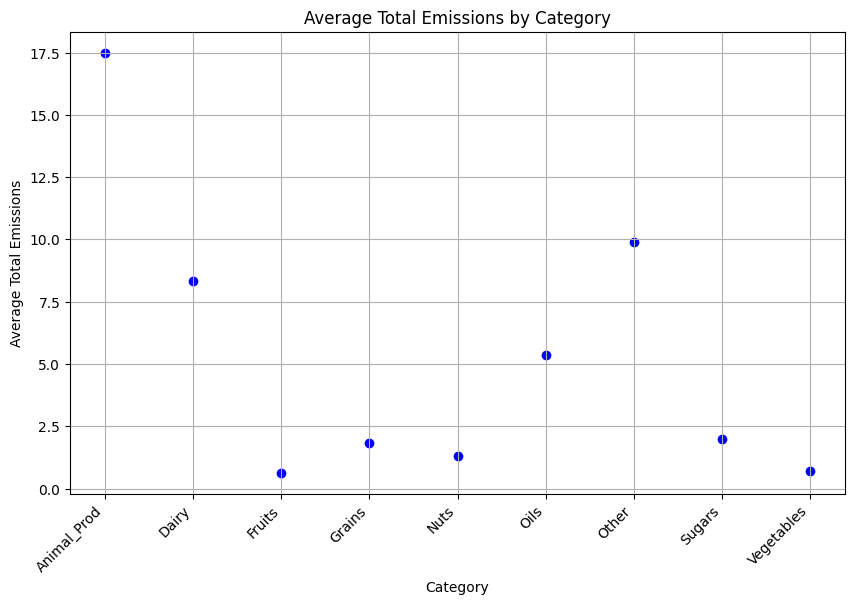

In [24]:
import matplotlib.pyplot as plt

# Calculate the average total emission for each category #
average_emission_by_category = df.groupby('Category')['Total_Emissions'].mean()

# Create a scatter plot #
plt.figure(figsize=(10, 6))
plt.scatter(average_emission_by_category.index, average_emission_by_category.values, color='blue')

# Add labels and title #
plt.xlabel('Category')
plt.ylabel('Average Total Emissions')
plt.title('Average Total Emissions by Category')

# Rotate x-axis labels for better readability #
plt.xticks(rotation=45, ha='right')

# Show plot #
plt.grid(True)
plt.show()


#### Total emissions by food product

**17- Plot the Total emission by food product using a bar plot**


In [25]:
import plotly.express as px

# Plot total emission by food product using a bar plot #
fig = px.bar(df, x='Food product', y='Total_Emissions', title='Total Emission by Food Product')
fig.show()


**18- Which types of food have more negative impact on the environment? What conclusions can youd draw?**


In [26]:
# Sort the DataFrame by 'Total_Emissions' column in descending order #
df_sorted = df.sort_values(by='Total_Emissions', ascending=False)

# Display the sorted DataFrame as a table #
print(df_sorted[['Food product', 'Total_Emissions']])


           Food product  Total_Emissions
33     Beef (beef herd)             59.6
35        Lamb & Mutton             24.5
39               Cheese             21.2
34    Beef (dairy herd)             21.1
32       Dark Chocolate             18.7
31               Coffee             16.5
42     Shrimps (farmed)             11.8
16             Palm Oil              7.6
36             Pig Meat              7.2
37         Poultry Meat              6.1
19            Olive Oil              6.0
15          Soybean Oil              6.0
41        Fish (farmed)              5.1
40                 Eggs              4.5
4                  Rice              4.0
18         Rapeseed Oil              3.7
17        Sunflower Oil              3.5
14                 Tofu              3.0
38                 Milk              2.8
7            Cane Sugar              2.6
12           Groundnuts              2.4
9          Other Pulses              1.6
3               Oatmeal              1.6
0   Wheat & Rye 

#### Total emissions by product category

**19- Plot the SUM of Total emission by Category using a bar plot**



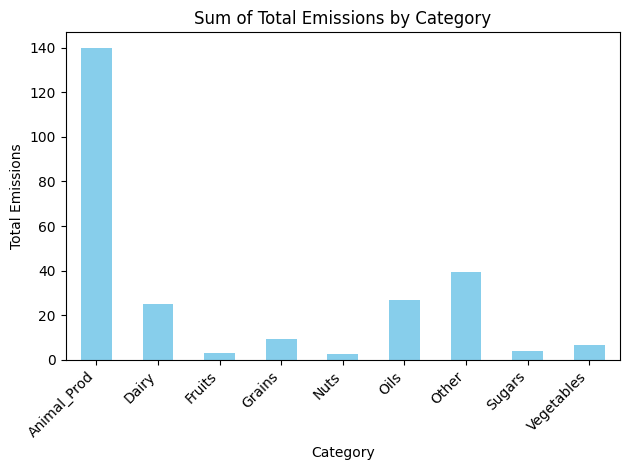

In [27]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Category' and calculate the sum of 'Total_Emissions' #
sum_by_category = df.groupby('Category')['Total_Emissions'].sum()

# Plot the summed emissions by category using a bar plot #
sum_by_category.plot(kind='bar', color='skyblue')
plt.title('Sum of Total Emissions by Category')
plt.xlabel('Category')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability #
plt.tight_layout()  # Adjust layout to prevent clipping of labels #
plt.show()


**20- Plot the SUM of Total emission by Category using a pie chart**


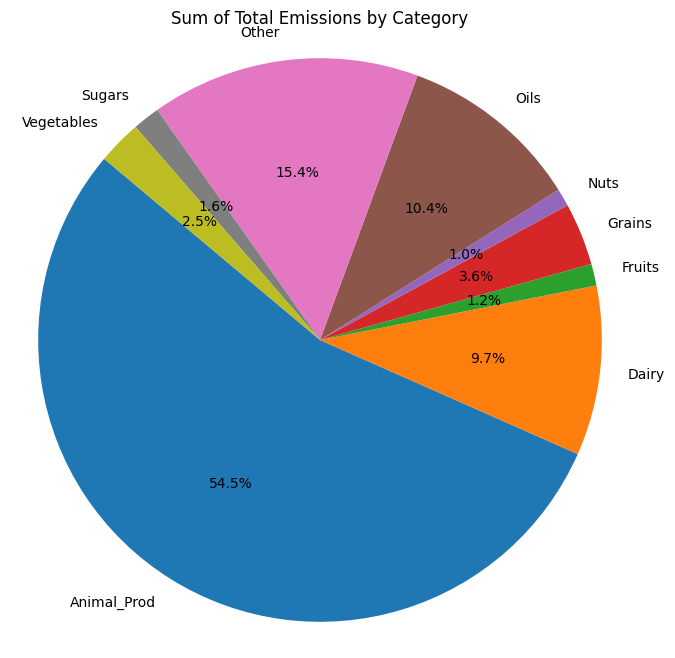

In [28]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Category' and calculate the sum of 'Total_Emissions' #
sum_by_category = df.groupby('Category')['Total_Emissions'].sum()

# Plot the summed emissions by category using a pie chart #
plt.figure(figsize=(8, 8))
plt.pie(sum_by_category, labels=sum_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Sum of Total Emissions by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle #
plt.show()


#### 21- Which stage of food production contributes more to greenhouse gas emission?

**22- Plot the Total emission by supply chain using a bar chart**

Stages of supply chain:
1. Land usage
2. Farm
3. Animal Feed
4. Processing
5. Transport
6. Retail
7. Packaging

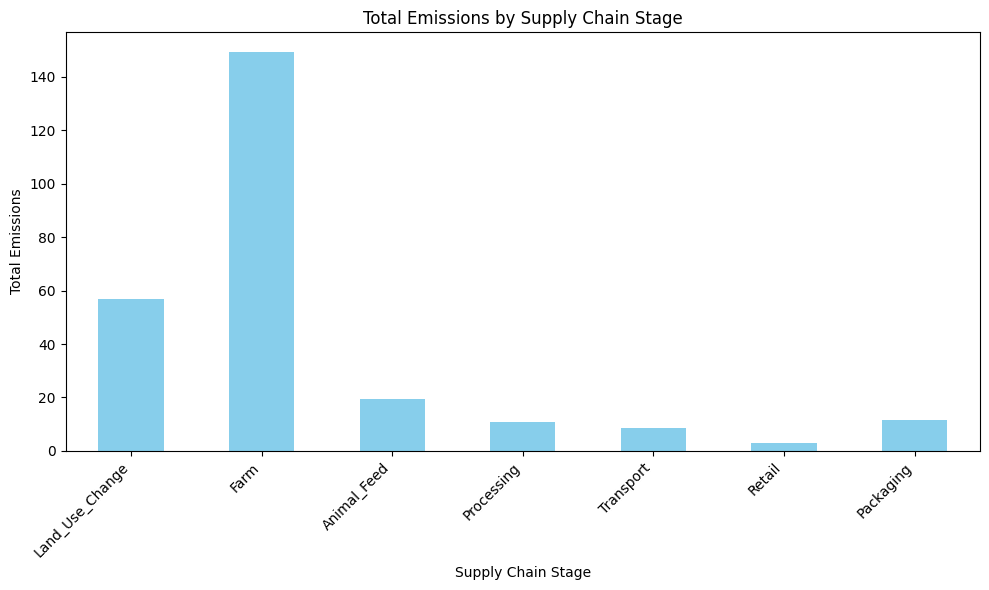

In [39]:
import matplotlib.pyplot as plt

# Calculate the total emissions for each supply chain stage
total_emissions_by_stage = df[['Land_Use_Change', 'Farm', 'Animal_Feed', 'Processing', 'Transport', 'Retail', 'Packaging']].sum()

# Plot the total emissions by supply chain stage using a bar chart
plt.figure(figsize=(10, 6))
total_emissions_by_stage.plot(kind='bar', color='skyblue')
plt.title('Total Emissions by Supply Chain Stage')
plt.xlabel('Supply Chain Stage')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**23- Plot the Total emissions by Food Product using a bar plot. Add the Supply chain as color.**


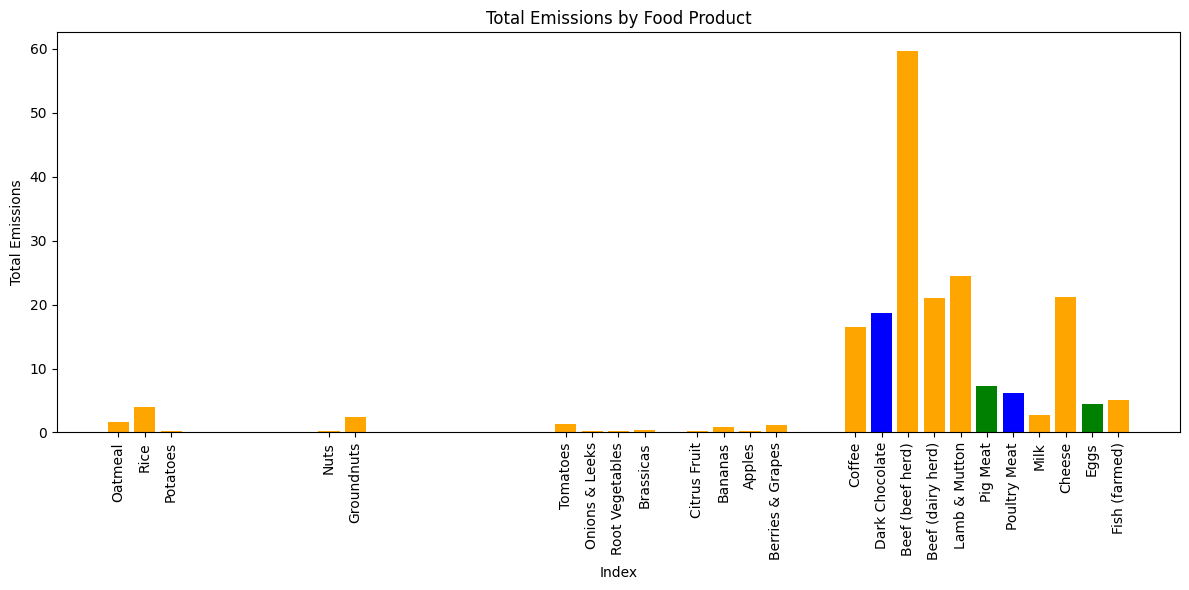

In [53]:
import matplotlib.pyplot as plt

# Drop rows with missing values #
df_reset_index = df.reset_index().dropna()

# Define a default color for NaN values #
default_color = 'gray'

# Define the color mapping dictionary including the supply chain components #
color_map = {
    'Land_Use_Change': 'blue',
    'Farm': 'orange',
    'Animal_Feed': 'green',
    'Processing': 'red',
    'Transport': 'purple',
    'Retail': 'brown',
    'Packaging': 'pink'
}

# Initialize a list to store the colors for each food product #
color_series = []

# Iterate over the rows of the DataFrame to find the maximum emission stage for each food product #
for index, row in df_reset_index.iterrows():
    max_stage = None
    max_emission = 0
    for stage in color_map.keys():
        emission = row[stage]
        if emission > max_emission:
            max_stage = stage
            max_emission = emission
    color_series.append(color_map.get(max_stage, default_color))

# Plot the Total emissions by Food Product using a bar plot with color based on supply chain component #
plt.figure(figsize=(12, 6))
plt.bar(df_reset_index.index, df_reset_index['Total_Emissions'], color=color_series)
plt.title('Total Emissions by Food Product')
plt.xlabel('Index')
plt.ylabel('Total Emissions')
plt.xticks(df_reset_index.index, df_reset_index['Food product'], rotation=90)
plt.tight_layout()
plt.show()







**24- Plot the Total emissions by Food Product using a bar plot. Add the Category as color.**

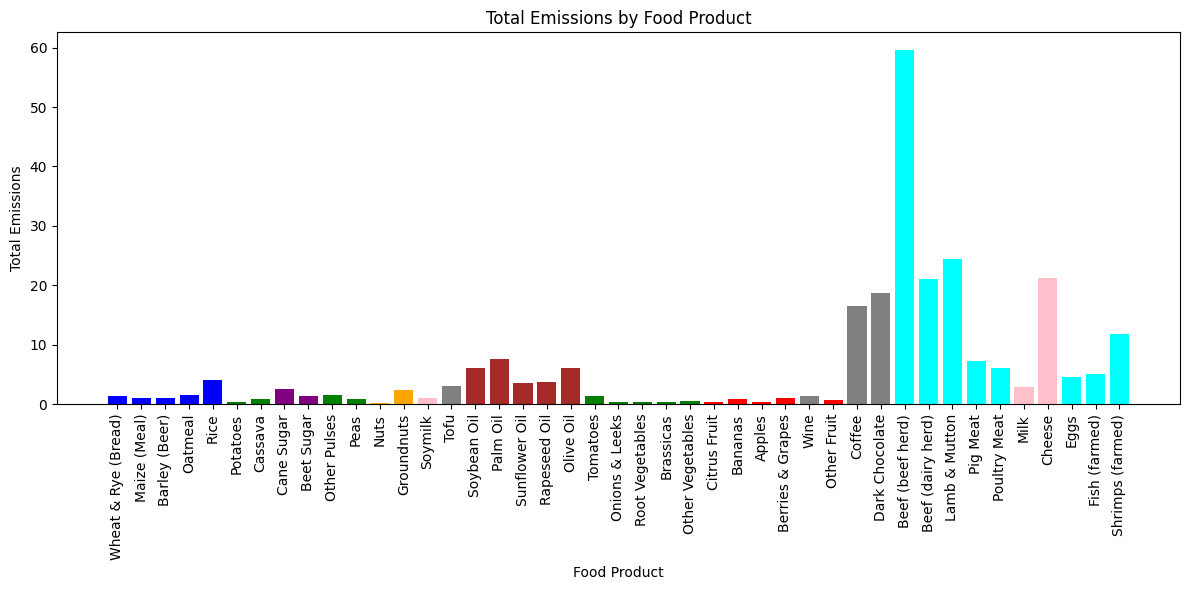

In [54]:
import matplotlib.pyplot as plt

# Define a color mapping dictionary for categories #
color_map = {
    'Grains': 'blue',
    'Nuts': 'orange',
    'Vegetables': 'green',
    'Fruits': 'red',
    'Sugars': 'purple',
    'Oils': 'brown',
    'Dairy': 'pink',
    'Animal_Prod': 'cyan',
    'Other': 'gray'
}

# Plot the Total emissions by Food Product using a bar plot with Category as color #
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Total_Emissions'], color=df['Category'].map(color_map))
plt.title('Total Emissions by Food Product')
plt.xlabel('Food Product')
plt.ylabel('Total Emissions')
plt.xticks(df.index, df['Food product'], rotation=90)
plt.tight_layout()
plt.show()


**25- How can we promote sustainable and nutritious food production?**



Refocus food production on low emitting products and processes. Be vegan.

**26- Plot a bar chart that displays the land used to produce 1 Kg of Food**

Be careful here! You might face some issues while working with NaN values. Make sure to follow the steps explained earlier!

In [57]:
print(df.columns)


Index(['Food product', 'Land_Use_Change', 'Animal_Feed', 'Farm', 'Processing',
       'Transport', 'Packaging', 'Retail', 'Total_Emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater_Withdrawals_litresper_1000kcal',
       'Freshwater_Withdrawals_litresper_100g_protein',
       'Freshwater_Withdrawals_litresper__kg',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity_Weighted_Water_Use_litresper_kg',
       'Scarcity_Weighted_Water_Use_litresper_100g_protein',
       'Scarcity_Weighted_Water_Use_litresper_1000kcal', 'Category'],


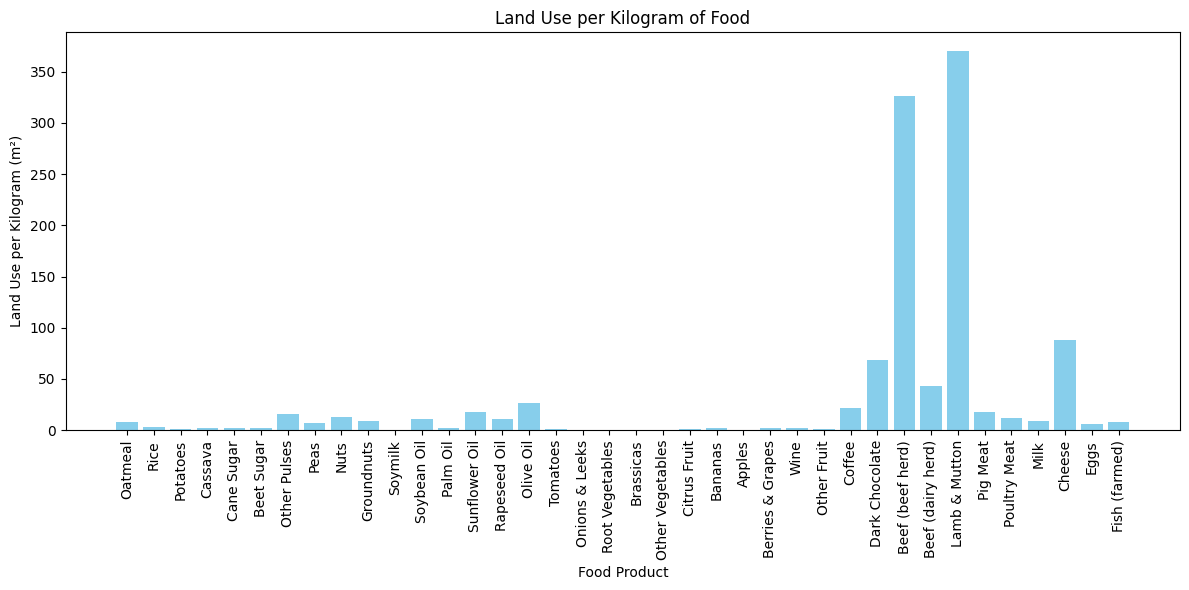

In [58]:
import matplotlib.pyplot as plt

# Create a new DataFrame with 'Food product' and 'Land use per kilogram' columns #
land_use_df = df[['Food product', 'Land use per kilogram (m² per kilogram)']]

# Drop rows with NaN values in the 'Land use per kilogram' column #
land_use_df = land_use_df.dropna(subset=['Land use per kilogram (m² per kilogram)'])

# Plot the bar chart #
plt.figure(figsize=(12, 6))
plt.bar(land_use_df['Food product'], land_use_df['Land use per kilogram (m² per kilogram)'], color='skyblue')
plt.title('Land Use per Kilogram of Food')
plt.xlabel('Food Product')
plt.ylabel('Land Use per Kilogram (m²)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



**27- Plot a bar chart that displays the land used to produce 1000kcal for every food product**


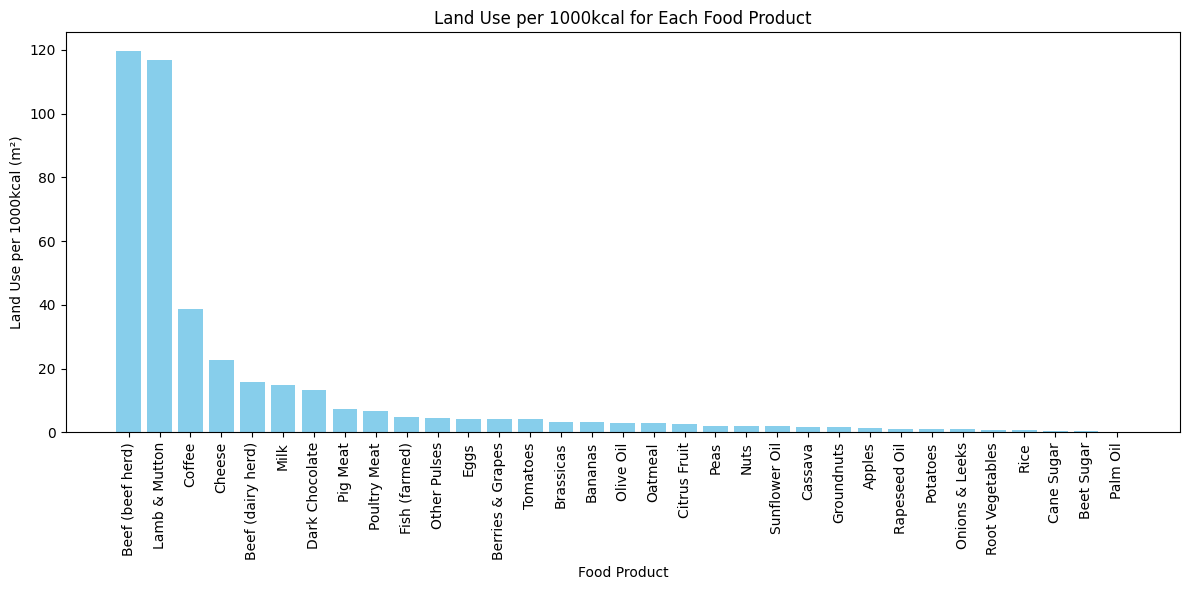

In [59]:
import matplotlib.pyplot as plt

# Create a new DataFrame with 'Food product' and 'Land use per 1000kcal' columns #
land_use_df = df[['Food product', 'Land use per 1000kcal (m² per 1000kcal)']]

# Drop rows with NaN values in the 'Land use per 1000kcal' column #
land_use_df = land_use_df.dropna(subset=['Land use per 1000kcal (m² per 1000kcal)'])

# Sort the DataFrame by 'Land use per 1000kcal' in descending order #
land_use_df = land_use_df.sort_values(by='Land use per 1000kcal (m² per 1000kcal)', ascending=False)

# Plot the land use per 1000kcal for each food product using a bar plot #
plt.figure(figsize=(12, 6))
plt.bar(land_use_df['Food product'], land_use_df['Land use per 1000kcal (m² per 1000kcal)'], color='skyblue')
plt.title('Land Use per 1000kcal for Each Food Product')
plt.xlabel('Food Product')
plt.ylabel('Land Use per 1000kcal (m²)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**28- Plot a bar chart that displays the water used to produce 1000kcal for every food product**


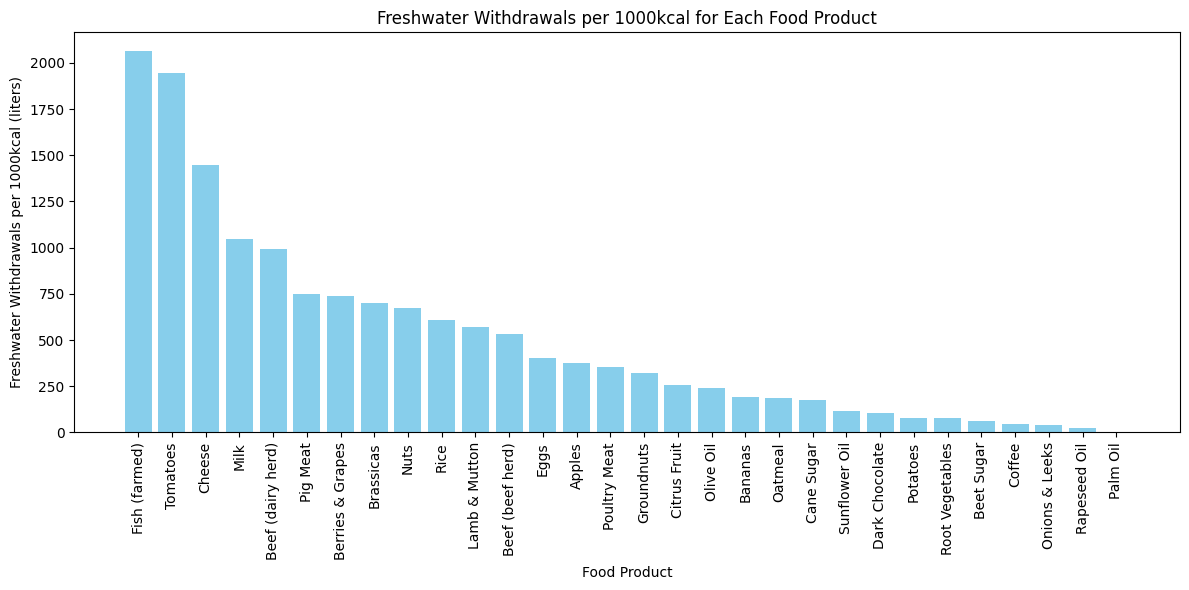

In [64]:
import matplotlib.pyplot as plt

# Create a new DataFrame with 'Food product' and 'Freshwater_Withdrawals_litresper_1000kcal' columns #
water_use_df = df[['Food product', 'Freshwater_Withdrawals_litresper_1000kcal']]

# Drop rows with NaN values in the 'Freshwater_Withdrawals_litresper_1000kcal' column #
water_use_df = water_use_df.dropna(subset=['Freshwater_Withdrawals_litresper_1000kcal'])

# Sort the DataFrame by 'Freshwater_Withdrawals_litresper_1000kcal' in descending order #
water_use_df = water_use_df.sort_values(by='Freshwater_Withdrawals_litresper_1000kcal', ascending=False)

# Plot the freshwater withdrawals per 1000kcal for each food product using a bar plot #
plt.figure(figsize=(12, 6))
plt.bar(water_use_df['Food product'], water_use_df['Freshwater_Withdrawals_litresper_1000kcal'], color='skyblue')
plt.title('Freshwater Withdrawals per 1000kcal for Each Food Product')
plt.xlabel('Food Product')
plt.ylabel('Freshwater Withdrawals per 1000kcal (liters)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



**29- Plot a bar chart that displays the water used to produce 1Kg for every food product**

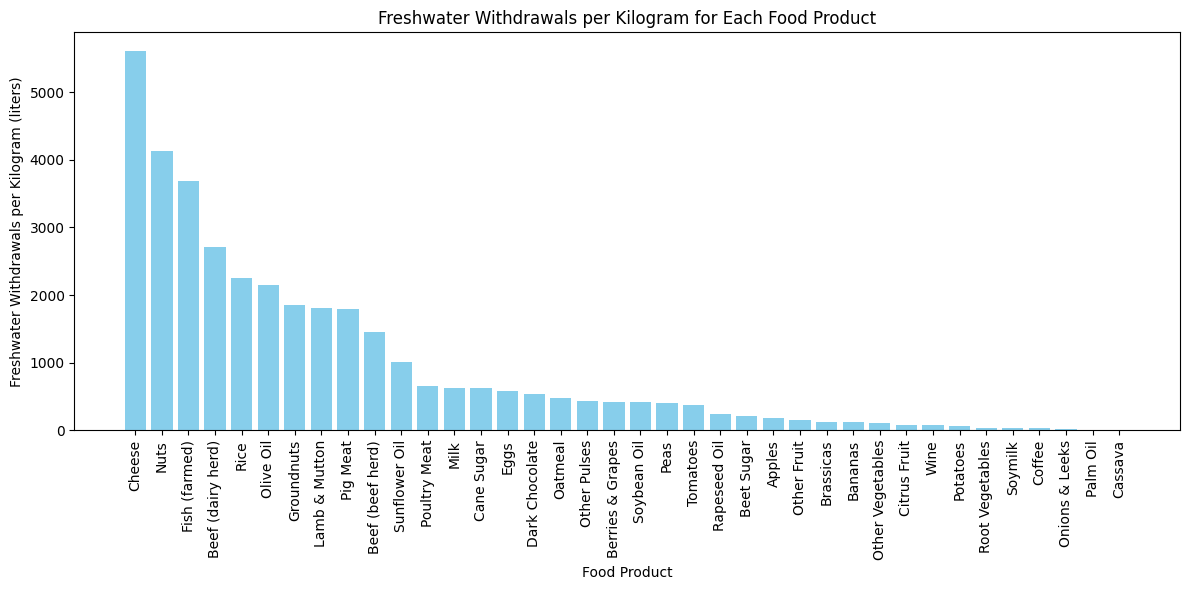

In [65]:
import matplotlib.pyplot as plt

# Create a new DataFrame with 'Food product' and 'Freshwater withdrawals per kilogram' columns #
water_use_df = df[['Food product', 'Freshwater_Withdrawals_litresper__kg']]

# Drop rows with NaN values in the 'Freshwater withdrawals per kilogram' column #
water_use_df = water_use_df.dropna(subset=['Freshwater_Withdrawals_litresper__kg'])

# Sort the DataFrame by 'Freshwater withdrawals per kilogram' in descending order #
water_use_df = water_use_df.sort_values(by='Freshwater_Withdrawals_litresper__kg', ascending=False)

# Plot the freshwater withdrawals per kilogram for each food product using a bar plot #
plt.figure(figsize=(12, 6))
plt.bar(water_use_df['Food product'], water_use_df['Freshwater_Withdrawals_litresper__kg'], color='skyblue')
plt.title('Freshwater Withdrawals per Kilogram for Each Food Product')
plt.xlabel('Food Product')
plt.ylabel('Freshwater Withdrawals per Kilogram (liters)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Heatmap to check the relation among different attributes of foods

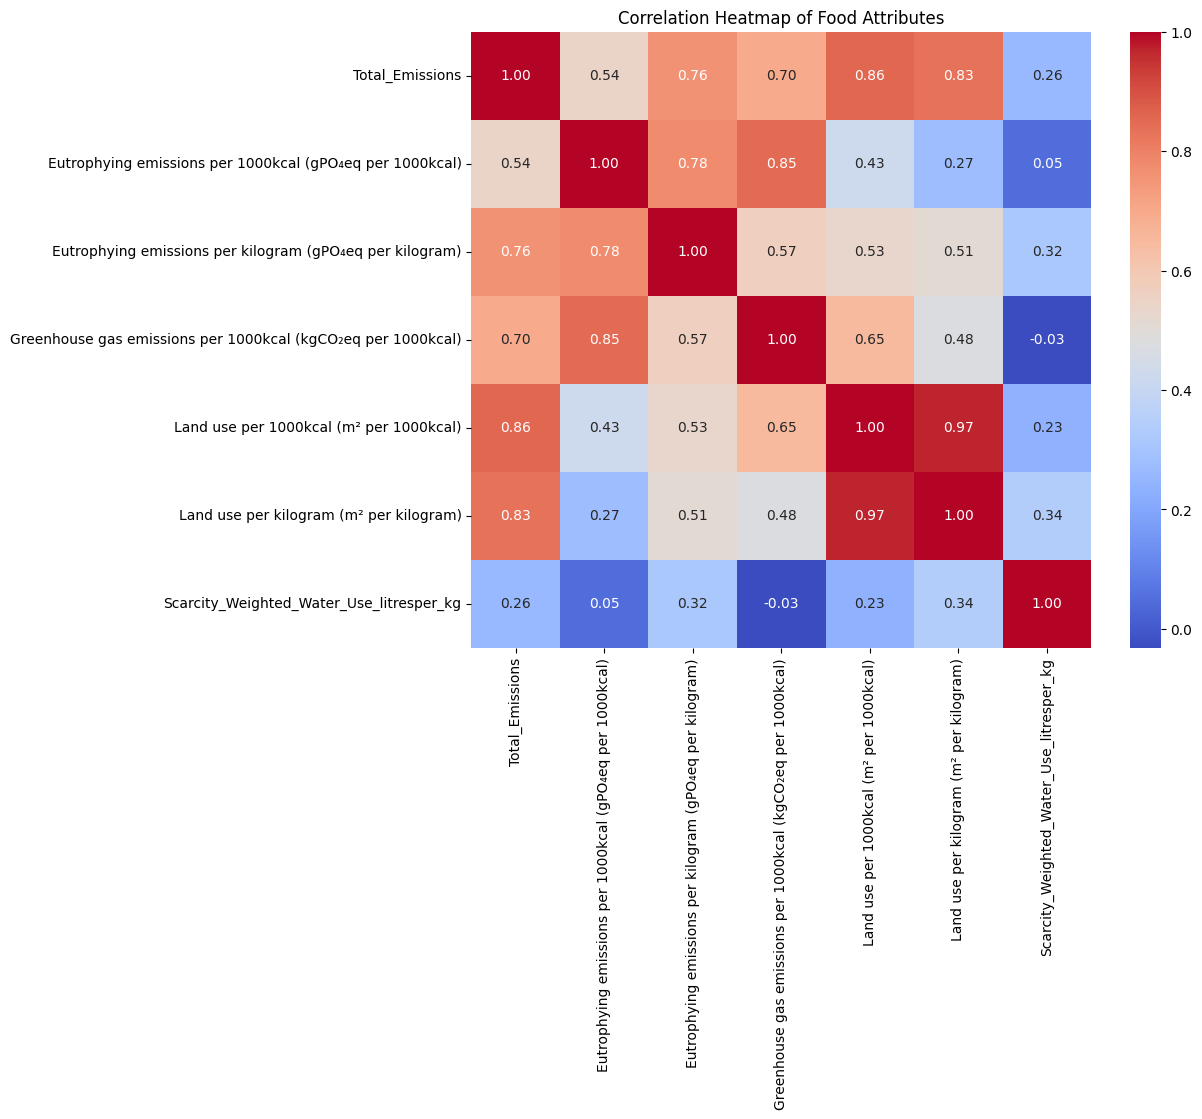

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical attributes #
numerical_attributes = df[['Total_Emissions', 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
                           'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
                           'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
                           'Land use per 1000kcal (m² per 1000kcal)',
                           'Land use per kilogram (m² per kilogram)',
                           'Scarcity_Weighted_Water_Use_litresper_kg']]

# Calculate correlation matrix #
correlation_matrix = numerical_attributes.corr()

# Create heatmap #
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Food Attributes')
plt.show()


### Conclusion

**30- What can be the strategy to reduce greenhouse gas emissions regarding our food consumption?**




Reducing greenhouse gas emissions related to food consumption requires a multifaceted approach that addresses various stages of the food supply chain.
Here are some strategies based on the factors we've explored:

    BE VEGAN! Choose plant-based options: Plant-based foods generally have lower emissions compared to animal-based foods. Increasing the consumption of fruits, vegetables, grains, legumes, and nuts can significantly reduce emissions.

    Reduce food waste: Food waste contributes to greenhouse gas emissions as it decomposes in landfills, emitting methane. Minimizing food waste through better meal planning, proper storage, and composting can help lower emissions.

    Minimise / Optimize transportation: Choose locally produced foods when possible to reduce emissions associated with transportation. Additionally, consider reducing the frequency of trips or consolidate deliveries.

    Support sustainable farming practices: Choose food products from farms that employ sustainable agricultural practices, such as low-till farming, crop rotation, and organic farming. These practices can help sequester carbon in the soil and reduce emissions associated with conventional farming methods.

    Reduce consumption of high-emission foods: Some foods have disproportionately high greenhouse gas emissions compared to others. Reducing consumption of beef, lamb, and other high-emission animal products can have a significant impact on overall emissions.

    Advocate for policy changes: Support policies and initiatives at local, national, and international levels that promote sustainable food production, reduce food waste, and incentivise low-emission farming practices.

    Educate and raise awareness: Increasing awareness about the environmental impact of food choices can empower individuals to make more sustainable decisions. Educational campaigns, workshops, and community initiatives can help spread awareness and encourage behavior change.